In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#in Kaggle, File -> Add or upload data -> search for credit card
#note about the folder: ../input/creditcard
#change the folder if you have data in a different folder
data = pd.read_csv("../input/creditcard/creditcard.csv")
#data.head()
data.describe()

FileNotFoundError: [Errno 2] No such file or directory: '../input/creditcard/creditcard.csv'

In [ ]:
#check if there are missing data
data.isnull().any().any()

#change 'Class' dtype to "bool"
data['Class'] = data['Class'].astype('bool')

In [ ]:
class_zero = data.Class.value_counts().values[0]
class_one = data.Class.value_counts().values[1]
print(data["Class"].value_counts())

False    284315
True        492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class distribution')

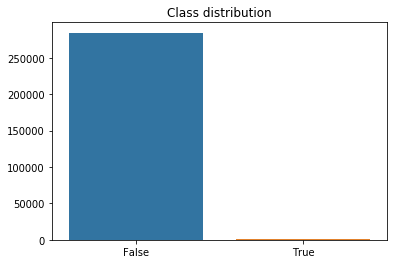

In [ ]:
sb.barplot(x=data.Class.value_counts().index.values, y=data.Class.value_counts().values)
plt.title("Class distribution")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
data['AmountNormalized'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['AmountNormalized'].describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: AmountNormalized, dtype: float64

In [ ]:
X = data.iloc[:, data.columns != 'Class'].values
y = data.iloc[:, data.columns == 'Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
def plot_precision_recall_curve(y_actual, y_score, model_name):
    precision, recall, _ = metrics.precision_recall_curve(y_actual, y_score)
    curve_data = pd.DataFrame(columns = range(0, len(precision)))
    curve_data.loc['Precision'] = precision
    curve_data.loc['Recall'] = recall
    #print (curve_data)
    plt.step(recall, precision, color='b', alpha=0.1, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
    plt.title('Precision Recall Curve for {} Model'.format(model_name))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.0])

def evaluate_model(y_actual, y_pred, y_score, model_name):
    cm = metrics.confusion_matrix(y_actual, y_pred)
    print ('Confusion Matrix for {} Model'.format(model_name))
    print (cm)
    print ('Classification Report for {} Model'.format(model_name))
    print (metrics.classification_report(y_actual, y_pred, digits=6))
    print ('Area under under ROC curve for {} Model'.format(model_name))
    print (metrics.roc_auc_score(y_actual, y_score))
    plot_precision_recall_curve(y_actual, y_score, model_name)

Confusion Matrix for KNN (n=5) Model
[[56861     0]
 [   96     5]]
Classification Report for KNN (n=5) Model
              precision    recall  f1-score   support

       False   0.998315  1.000000  0.999157     56861
        True   1.000000  0.049505  0.094340       101

    accuracy                       0.998315     56962
   macro avg   0.999157  0.524752  0.546748     56962
weighted avg   0.998318  0.998315  0.997552     56962

Area under under ROC curve for KNN (n=5) Model
0.5777933195088735


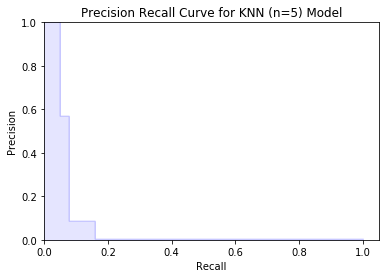

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=5)')

Confusion Matrix for KNN (n=7) Model
[[56861     0]
 [   97     4]]
Classification Report for KNN (n=7) Model
              precision    recall  f1-score   support

       False   0.998297  1.000000  0.999148     56861
        True   1.000000  0.039604  0.076190       101

    accuracy                       0.998297     56962
   macro avg   0.999148  0.519802  0.537669     56962
weighted avg   0.998300  0.998297  0.997511     56962

Area under under ROC curve for KNN (n=7) Model
0.5769785829992576


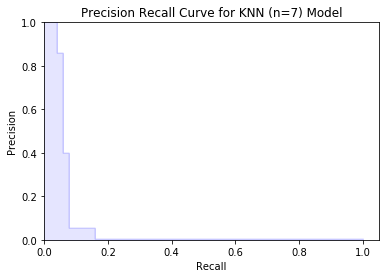

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=7, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=7)')

Confusion Matrix for KNN (n=9) Model
[[56860     1]
 [  100     1]]
Classification Report for KNN (n=9) Model
              precision    recall  f1-score   support

       False   0.998244  0.999982  0.999113     56861
        True   0.500000  0.009901  0.019417       101

    accuracy                       0.998227     56962
   macro avg   0.749122  0.504942  0.509265     56962
weighted avg   0.997361  0.998227  0.997376     56962

Area under under ROC curve for KNN (n=9) Model
0.5811838178946365


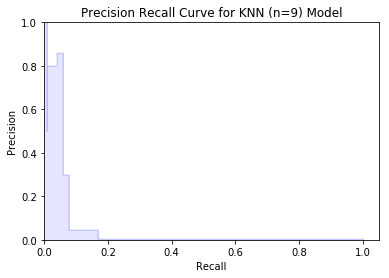

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=9, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=9)')

Confusion Matrix for KNN (n=9) Model
[[56861     0]
 [   93     8]]
Classification Report for KNN (n=9) Model
              precision    recall  f1-score   support

       False   0.998367  1.000000  0.999183     56861
        True   1.000000  0.079208  0.146789       101

    accuracy                       0.998367     56962
   macro avg   0.999184  0.539604  0.572986     56962
weighted avg   0.998370  0.998367  0.997671     56962

Area under under ROC curve for KNN (n=9) Model
0.6422227140320124


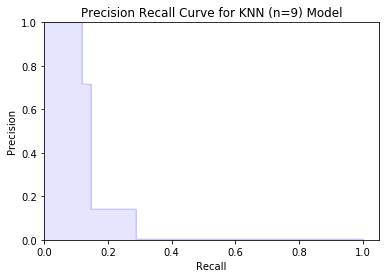

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=9, metric= 'minkowski', p=1)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=9)')

Confusion Matrix for KNN (n=7) Model
[[56861     0]
 [   91    10]]
Classification Report for KNN (n=7) Model
              precision    recall  f1-score   support

       False   0.998402  1.000000  0.999200     56861
        True   1.000000  0.099010  0.180180       101

    accuracy                       0.998402     56962
   macro avg   0.999201  0.549505  0.589690     56962
weighted avg   0.998405  0.998402  0.997748     56962

Area under under ROC curve for KNN (n=7) Model
0.6426162392535836


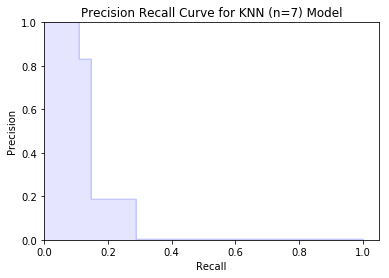

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=7, metric= 'minkowski', p=1)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=7)')

Confusion Matrix for KNN (n=5) Model
[[56861     0]
 [   90    11]]
Classification Report for KNN (n=5) Model
              precision    recall  f1-score   support

       False   0.998420  1.000000  0.999209     56861
        True   1.000000  0.108911  0.196429       101

    accuracy                       0.998420     56962
   macro avg   0.999210  0.554455  0.597819     56962
weighted avg   0.998422  0.998420  0.997786     56962

Area under under ROC curve for KNN (n=5) Model
0.6379445202570591


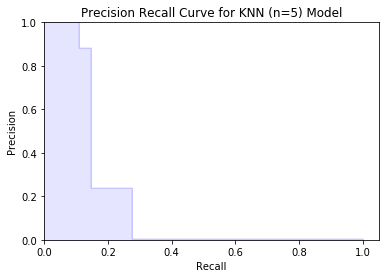

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=1)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=5)')

Confusion Matrix for Logistic Regression Model
[[56852     9]
 [   45    56]]
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

       False   0.999209  0.999842  0.999525     56861
        True   0.861538  0.554455  0.674699       101

    accuracy                       0.999052     56962
   macro avg   0.930374  0.777149  0.837112     56962
weighted avg   0.998965  0.999052  0.998949     56962

Area under under ROC curve for Logistic Regression Model
0.9626541082204808


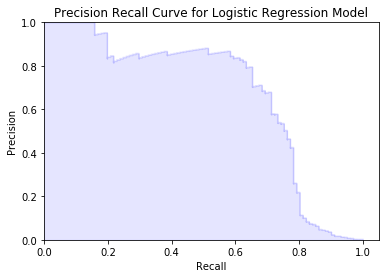

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

#note y_train.ravel()
lr.fit(X_train, y_train.ravel())
y_pred_lr = lr.predict(X_test)
y_score_lr = lr.decision_function(X_test)
y_prob_lr = lr.predict_proba(X_test)

evaluate_model(y_test, y_pred_lr, y_prob_lr[:,[1]], 'Logistic Regression')

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with the Manhattan distance metric
knn_manhattan = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Accuracy (Manhattan Distance): {accuracy_manhattan:.2f}")


Accuracy (Manhattan Distance): 0.98
